<a href="https://colab.research.google.com/github/clanderson23/Atlantic-Hurricanes-1851-2015/blob/main/Atlantic_Hurricane_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Atlantic Hurricane Data 1851-2015

**Goals:**
Have hurricanes been getting stronger with time? In this dataset we are going to investigate whether or not hurricanes are getting stronger, weaker, or have remained on the same cycle for the amount of time presented in this dataset.

Dataset: https://www.kaggle.com/datasets/maravedi/atlantic-hurricane-database

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.stats import ttest_ind
from scipy import stats
sns.set()
from google.colab import drive
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#import pandas and the dataset
import pandas as pd
atl_hurr_df=pd.read_csv('/content/gdrive/My Drive/Atlantic_Hurricane_Data.csv')

atl_hurr_df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
atl_hurr_df.shape

(49105, 22)

In [ ]:
null_df= atl_hurr_df.isna().sum()
print(null_df)

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64


Check for null values: There are no nulls in this dataset.
However, there are values of -999 for years where the data was not collected. We want to collect all the data we have, but we don't want -999 to impact our analysis. 

We need to use if/then statements to isolate the "-999" factors and keep them out of our analysis. 

In [ ]:
names_df= atl_hurr_df['Name'].value_counts()
names_df

            UNNAMED    26563
            FRANCES      317
             ARLENE      283
             BERTHA      268
             DENNIS      255
                       ...  
              SHARY        9
              TAMMY        9
            SIXTEEN        8
            FERNAND        7
             AMELIA        6
Name: Name, Length: 288, dtype: int64

There are 26,563 hurricanes that are unnamed. There are many hurricanes that have the same names. This means we should categorize our data by ID number, not by name. 

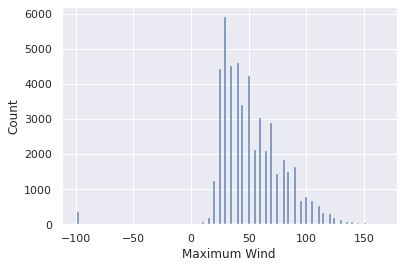

In [ ]:
ax=sns.histplot(atl_hurr_df['Maximum Wind'])

**Winds greater than 100mph**

Let's narrow down our search for the strongest hurricanes and attempt to create a visual that will help track strenght of hurricanes over time. 

In [ ]:
winds_over_100 = atl_hurr_df['Maximum Wind'] >100

winds_over_100

0        False
1        False
2        False
3        False
4        False
         ...  
49100    False
49101    False
49102    False
49103    False
49104    False
Name: Maximum Wind, Length: 49105, dtype: bool

**Select Data with Winds over 100mph:**

Here we can see that the results for "Winds over 100mph" are demonstrated in a Boolean. Let's select ONLY the True statements, that is, every hurricane with winds over 100mph.



In [ ]:
winds_100_df = atl_hurr_df.iloc[winds_over_100.values]
winds_100_df


,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
249,AL031853,UNNAMED,18530902,1800,,HU,17.4N,51.0W,110,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
250,AL031853,UNNAMED,18530903,0,,HU,18.2N,52.8W,120,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
251,AL031853,UNNAMED,18530903,600,,HU,19.1N,54.6W,130,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
252,AL031853,UNNAMED,18530903,1200,,HU,19.7N,56.2W,130,924,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
253,AL031853,UNNAMED,18530903,1800,,HU,20.7N,58.0W,130,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49037,AL112015,JOAQUIN,20151003,600,,HU,24.8N,73.6W,120,945,...,140,120,80,90,60,60,50,50,40,45
49038,AL112015,JOAQUIN,20151003,1200,,HU,25.4N,72.6W,135,934,...,130,110,80,90,60,60,45,55,40,40
49039,AL112015,JOAQUIN,20151003,1800,,HU,26.3N,71.0W,130,934,...,130,110,70,90,60,50,45,55,40,40
49040,AL112015,JOAQUIN,20151004,0,,HU,27.4N,69.5W,115,941,...,130,110,70,90,50,50,40,50,35,35


Now let's sort the data. We need to find the top wind speeds by sorting "Maximum Wind" from highest wind speed to smallest. 

In [ ]:
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', 
#na_position='last', ignore_index=False, key=None)


max_wind_df = winds_100_df.sort_values('Maximum Wind', axis=0, ascending=False)
max_wind_df

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
33731,AL041980,ALLEN,19800807,1800,,HU,21.8N,86.4W,165,899,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
44435,AL252005,WILMA,20051019,1200,,HU,17.3N,82.8W,160,882,...,90,140,70,45,45,70,45,20,20,45
17943,AL031935,UNNAMED,19350903,600,,HU,25.1N,81.1W,160,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
17942,AL031935,UNNAMED,19350903,200,L,HU,24.8N,80.8W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
17941,AL031935,UNNAMED,19350903,0,,HU,24.6N,80.5W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19641,AL051941,UNNAMED,19411005,1800,,HU,24.2N,75.4W,105,962,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
20037,AL031943,UNNAMED,19430823,0,,HU,24.5N,65.0W,105,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
20038,AL031943,UNNAMED,19430823,600,,HU,25.5N,65.5W,105,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
20068,AL041943,UNNAMED,19430904,600,,HU,32.5N,61.2W,105,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [ ]:
#>>> df = DataFrame({'a': [1, 10, 8, 11, -1],
#...                 'b': list('abdce'),
#...                 'c': [1.0, 2.0, np.nan, 3.0, 4.0]})
#>>> df.nlargest(3, 'a')
#    a  b   c
#3  11  c   3
#1  10  b   2
#2   8  d NaN

**Top Ten Toughest Hurricanes: Maximum Wind**

Let's look at the top ten hurricanes with maximum wind speed. 

In [ ]:
max_wind_df.nlargest(10, 'Maximum Wind')

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
33731,AL041980,ALLEN,19800807,1800,,HU,21.8N,86.4W,165,899,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
44435,AL252005,WILMA,20051019,1200,,HU,17.3N,82.8W,160,882,...,90,140,70,45,45,70,45,20,20,45
17943,AL031935,UNNAMED,19350903,600,,HU,25.1N,81.1W,160,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
17942,AL031935,UNNAMED,19350903,200,L,HU,24.8N,80.8W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
17941,AL031935,UNNAMED,19350903,0,,HU,24.6N,80.5W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
36445,AL081988,GILBERT,19880914,0,,HU,19.7N,83.8W,160,888,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
33722,AL041980,ALLEN,19800805,1200,,HU,15.9N,70.5W,155,932,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
44318,AL182005,RITA,20050922,600,,HU,24.8N,87.6W,155,897,...,100,160,100,80,60,90,60,60,40,50
44317,AL182005,RITA,20050922,300,I,HU,24.7N,87.3W,155,895,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
40603,AL131998,MITCH,19981026,1800,,HU,16.9N,83.1W,155,905,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


Hurricane Allen in 1980 clocks in with the highest wind speeds. Now let's get our dates formatted so that we can graph the results. 

In [ ]:
import re

In [ ]:
max_wind_df['Date'] = pd.to_datetime(max_wind_df['Date'], format='%Y%m%d')
max_wind_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 33731 to 49041
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                2254 non-null   object        
 1   Name              2254 non-null   object        
 2   Date              2254 non-null   datetime64[ns]
 3   Time              2254 non-null   int64         
 4   Event             2254 non-null   object        
 5   Status            2254 non-null   object        
 6   Latitude          2254 non-null   object        
 7   Longitude         2254 non-null   object        
 8   Maximum Wind      2254 non-null   int64         
 9   Minimum Pressure  2254 non-null   int64         
 10  Low Wind NE       2254 non-null   int64         
 11  Low Wind SE       2254 non-null   int64         
 12  Low Wind SW       2254 non-null   int64         
 13  Low Wind NW       2254 non-null   int64         
 14  Moderate Wind NE  2

In [ ]:
 max_wind_df['Year'] = max_wind_df['Date'].dt.year
 max_wind_df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
33731,AL041980,ALLEN,1980-08-07,1800,,HU,21.8N,86.4W,165,899,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1980
44435,AL252005,WILMA,2005-10-19,1200,,HU,17.3N,82.8W,160,882,...,140,70,45,45,70,45,20,20,45,2005
17943,AL031935,UNNAMED,1935-09-03,600,,HU,25.1N,81.1W,160,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935
17942,AL031935,UNNAMED,1935-09-03,200,L,HU,24.8N,80.8W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935
17941,AL031935,UNNAMED,1935-09-03,0,,HU,24.6N,80.5W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935


Now we have dates on hurricanes sorted (YYYY-MM-DD). Let's do some visualization to see how these dates compare to the top ten hurricanes. 


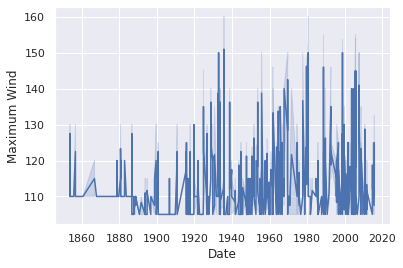

In [ ]:
import seaborn as sns
sns.lineplot(data=max_wind_df,x='Date', y='Maximum Wind')

The graph above shows every hurricane with winds above 100 mph from 1851-2015. We want to only see the top 10 hurricanes and their dates. Let's filter this data a bit further: 

In [ ]:
max_wind_sorted= data= max_wind_df.nlargest(10, 'Maximum Wind').sort_values('Maximum Wind', ascending = False)
max_wind_sorted

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Year
33731,AL041980,ALLEN,1980-08-07,1800,,HU,21.8N,86.4W,165,899,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1980
44435,AL252005,WILMA,2005-10-19,1200,,HU,17.3N,82.8W,160,882,...,140,70,45,45,70,45,20,20,45,2005
17943,AL031935,UNNAMED,1935-09-03,600,,HU,25.1N,81.1W,160,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935
17942,AL031935,UNNAMED,1935-09-03,200,L,HU,24.8N,80.8W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935
17941,AL031935,UNNAMED,1935-09-03,0,,HU,24.6N,80.5W,160,892,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1935
36445,AL081988,GILBERT,1988-09-14,0,,HU,19.7N,83.8W,160,888,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1988
33722,AL041980,ALLEN,1980-08-05,1200,,HU,15.9N,70.5W,155,932,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1980
44318,AL182005,RITA,2005-09-22,600,,HU,24.8N,87.6W,155,897,...,160,100,80,60,90,60,60,40,50,2005
44317,AL182005,RITA,2005-09-22,300,I,HU,24.7N,87.3W,155,895,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,2005
40603,AL131998,MITCH,1998-10-26,1800,,HU,16.9N,83.1W,155,905,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,1998


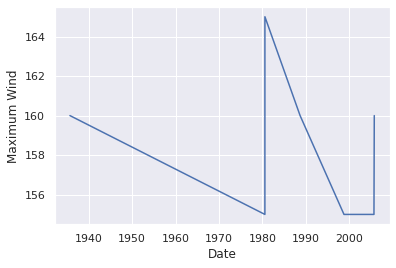

In [ ]:
#max_wind_df.nlargest(10, 'Maximum Wind')
#sns.lineplot(data=max_wind_df,x='Date', y='Maximum Wind')
#Combine these factors to limit to top 10 maximum wind hurricanes

sns.lineplot(data= max_wind_df.nlargest(10, 'Maximum Wind'), x='Date', y= 'Maximum Wind')

**Preliminary Conclusion**
The data shows that the strongest hurricane was Hurricane Allen in 1980. The strongest hurricanes were from 1980-1988, however, there are 3 hurricanes in 2005 which are also in the top ten. 

**Further Investigation:**
The year 1935 shows 3 hurricanes listed, each of which are "Unnamed." These three data entries are listed as separate hurricanes, however, upon some quick research, I discovered that this was the "Labor Day Hurricane," and that it was considered one hurricane but had mulitple landfalls. This was a significant category 5 hurricane, one of only four Category 5 hurricanes to make landfall on the continguous United States. [(SOURCE)](https://en.wikipedia.org/wiki/1935_Labor_Day_hurricane)